# MTH 4224 / CSE 4224 - Project 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (ConfusionMatrixDisplay, classification_report,
                             confusion_matrix)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Loading and Previewing Data

In [2]:
data_path = "data/manufacturing_defect_dataset.csv"
data = pd.read_csv(data_path)

In [ ]:
data.head(10)

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,762,11325.689263,89.252385,2,2.667570,87.141681,16,0.987719,3.574419,0.065727,95.917264,3,3288.043242,0.420186,4.733399,299.829577,0
3236,335,5598.837988,95.701437,4,0.751272,95.562997,11,0.178163,8.295295,0.097698,87.780846,8,2761.301593,0.126441,7.234421,245.524560,0
3237,835,11736.177712,96.431554,5,4.899756,77.973442,0,4.873429,3.844824,0.005724,81.590143,5,2000.621648,0.325530,5.436538,206.490010,1
3238,302,13664.196210,91.089782,1,4.057665,95.755591,6,0.071663,2.783298,0.042612,88.488525,6,1534.792169,0.222736,3.776924,203.771655,0


**Target column is "DefectStatus"**  

In [4]:
data.isna().any().any()

False

In [5]:
# Percentages of each value in the dataset
(data["DefectStatus"].value_counts() / data.shape[0]) * 100.0

DefectStatus
1    84.04321
0    15.95679
Name: count, dtype: float64

Luckily the dataset has no missing values. But, the dataset is imbalanced for our target column as shown above. This may be handled later.

Data Preparation

The X columns are standardized. This was required, otherwise LogisticRegression did not converge. 80% of the data is used for training and 20% of it is used for testing.

In [6]:
X = data.drop('DefectStatus', axis=1)
y = data['DefectStatus']
scaler = StandardScaler(copy=True)
scaler.set_output(transform="pandas")
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=1, test_size=0.2, shuffle=True)

Below, we see that the training set and the test set have roughly the same proportions of occurences of DefectStatus = 1 and DefectStatus = 0.

In [7]:
print(y_test.value_counts() / len(y_test))
print(y_train.value_counts() / len(y_train))

DefectStatus
1    0.848765
0    0.151235
Name: count, dtype: float64
DefectStatus
1    0.838349
0    0.161651
Name: count, dtype: float64


# Trying Basic Classifiers

In [8]:
def try_model(model):
    model.fit(X_train, y_train)
    y_test_predicted = model.predict(X_test)
    print(classification_report(y_test, y_test_predicted))
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicted, normalize="pred")
    plt.title(type(model).__name__)
    plt.show()

## k-Nearest Neighbors

              precision    recall  f1-score   support

           0       0.54      0.29      0.37        98
           1       0.88      0.96      0.92       550

    accuracy                           0.85       648
   macro avg       0.71      0.62      0.65       648
weighted avg       0.83      0.85      0.84       648



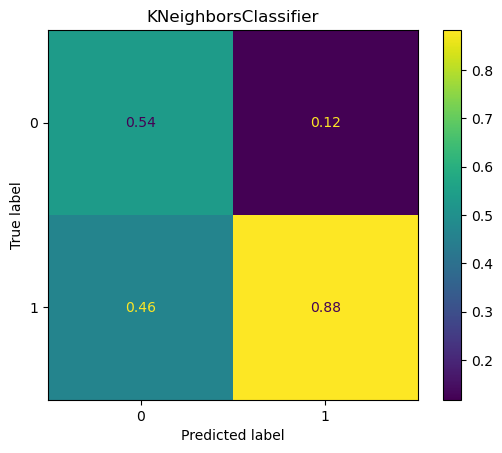

In [9]:
try_model(KNeighborsClassifier())

## Logistic Regression

              precision    recall  f1-score   support

           0       0.70      0.34      0.46        98
           1       0.89      0.97      0.93       550

    accuracy                           0.88       648
   macro avg       0.80      0.66      0.69       648
weighted avg       0.86      0.88      0.86       648



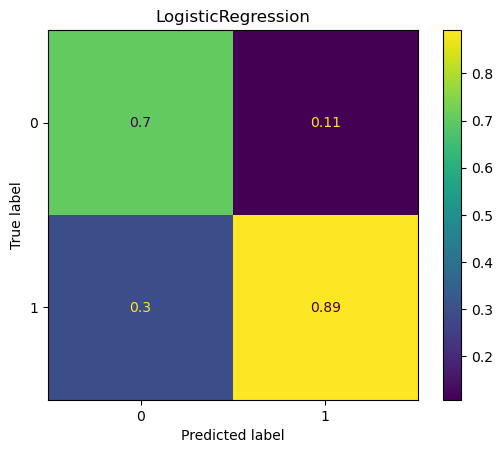

In [10]:
try_model(LogisticRegression(random_state=1))

## Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        98
           1       0.96      0.96      0.96       550

    accuracy                           0.93       648
   macro avg       0.87      0.86      0.86       648
weighted avg       0.93      0.93      0.93       648



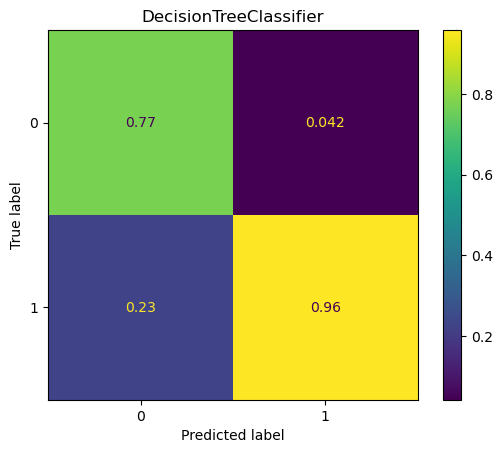

In [11]:
try_model(DecisionTreeClassifier(random_state=1))

## Support Vector Machine

              precision    recall  f1-score   support

           0       0.76      0.39      0.51        98
           1       0.90      0.98      0.94       550

    accuracy                           0.89       648
   macro avg       0.83      0.68      0.73       648
weighted avg       0.88      0.89      0.87       648



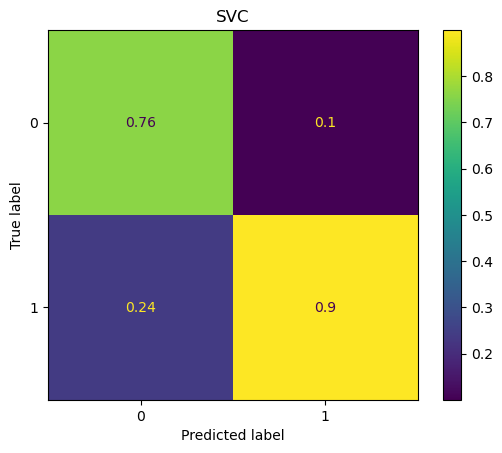

In [12]:
try_model(SVC(random_state=1))

## Random Forest Classifier

              precision    recall  f1-score   support

           0       0.97      0.77      0.86        98
           1       0.96      1.00      0.98       550

    accuracy                           0.96       648
   macro avg       0.97      0.88      0.92       648
weighted avg       0.96      0.96      0.96       648



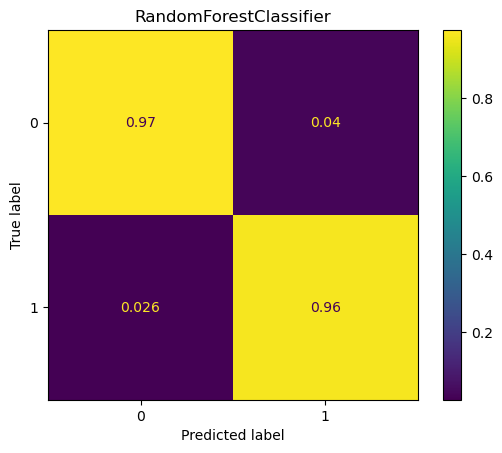

In [13]:
# TODO: Try using class-weight to fix class imbalance
try_model(RandomForestClassifier(random_state=1))

# Tuning The Classifier

The basic RandomForestClassifier had the most success. So, this model will be tuned to improve accuracy. Below, we'll see how many trees in the random forest we actually need.

## Changing Number of Trees

In [14]:
n_vals = [i for i in range(10, 101, 10)]
for n in n_vals:
    model = RandomForestClassifier(random_state=1,n_estimators=n)
    model.fit(X_train, y_train)
    y_test_predicted = model.predict(X_test)
    conf = confusion_matrix(y_test, y_test_predicted, normalize="pred")
    print(f"At n = {str(n)}")
    print(conf)

At n = 10
[[0.96153846 0.04035088]
 [0.03846154 0.95964912]]
At n = 20
[[0.97333333 0.04363002]
 [0.02666667 0.95636998]]
At n = 30
[[0.97402597 0.04028021]
 [0.02597403 0.95971979]]
At n = 40
[[0.97402597 0.04028021]
 [0.02597403 0.95971979]]
At n = 50
[[0.97402597 0.04028021]
 [0.02597403 0.95971979]]
At n = 60
[[0.97402597 0.04028021]
 [0.02597403 0.95971979]]
At n = 70
[[0.97402597 0.04028021]
 [0.02597403 0.95971979]]
At n = 80
[[0.97402597 0.04028021]
 [0.02597403 0.95971979]]
At n = 90
[[0.97402597 0.04028021]
 [0.02597403 0.95971979]]
At n = 100
[[0.97402597 0.04028021]
 [0.02597403 0.95971979]]


From this data, we see that the model performs exactly the same way at n=30 as it does at n=100 (where n = number of trees). So, for optimization, we will reduce the number of tress to 30.

## Changing Split Quality/Criterion Function

              precision    recall  f1-score   support

           0       0.97      0.78      0.86        98
           1       0.96      1.00      0.98       550

    accuracy                           0.96       648
   macro avg       0.97      0.89      0.92       648
weighted avg       0.96      0.96      0.96       648



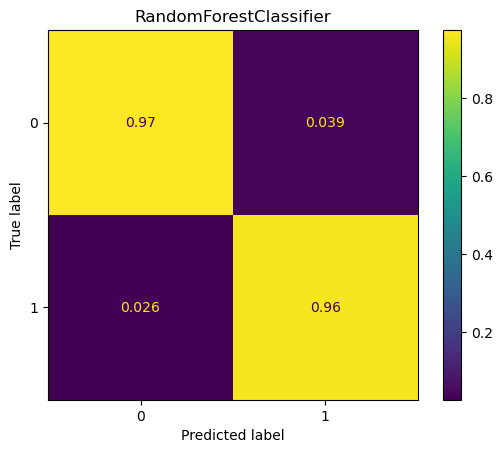

In [17]:
try_model(RandomForestClassifier(n_estimators=30,criterion='log_loss', random_state=1))

The log-loss split quality function is mildly better, so it will now used. The entropy quality function was also tried (but not shown), and it gets the exact same value.

              precision    recall  f1-score   support

           0       0.97      0.78      0.86        98
           1       0.96      1.00      0.98       550

    accuracy                           0.96       648
   macro avg       0.97      0.89      0.92       648
weighted avg       0.96      0.96      0.96       648



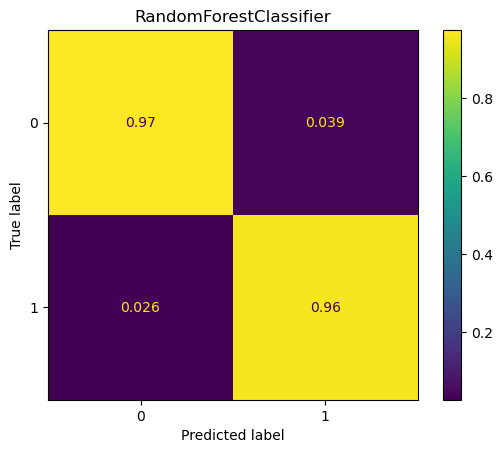

In [19]:
try_model(RandomForestClassifier(n_estimators=30,criterion='log_loss',class_weight="balanced_subsample", random_state=1))